<a href="https://colab.research.google.com/github/Nyraa1/MLProjectsRepo/blob/master/Startup50_linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


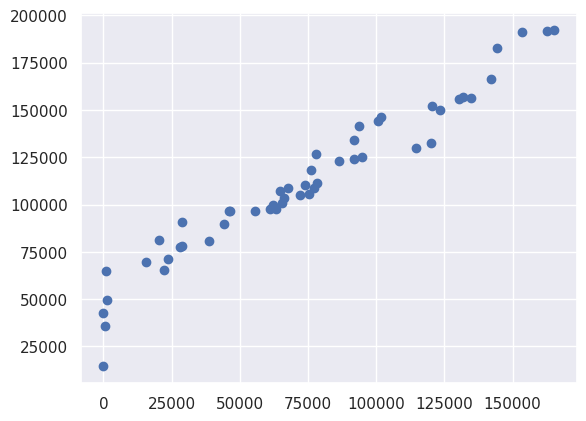

In [5]:
plt.scatter(df['R&D Spend'],df['Profit'])


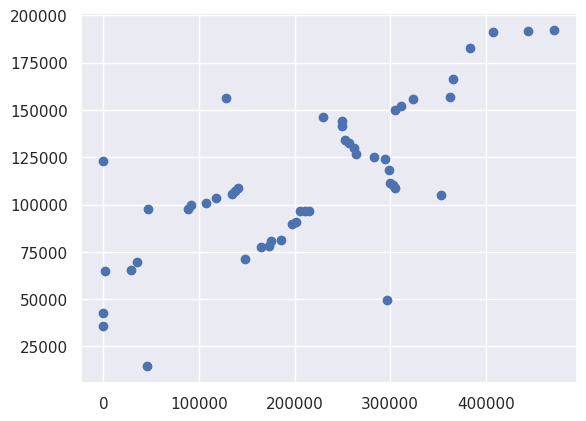

In [6]:
plt.scatter(df['Marketing Spend'],df['Profit'])

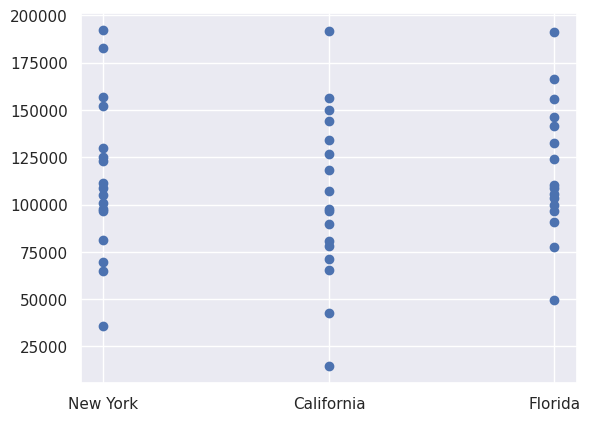

In [7]:
plt.scatter(df['State'],df['Profit'])

<Axes: ylabel='R&D Spend'>

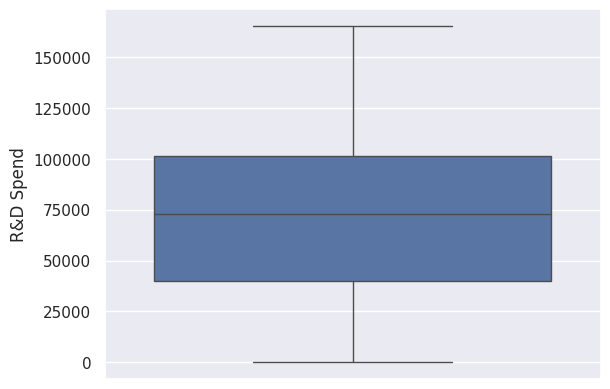

In [8]:
sns.boxplot(df['R&D Spend'])

<Axes: ylabel='Administration'>

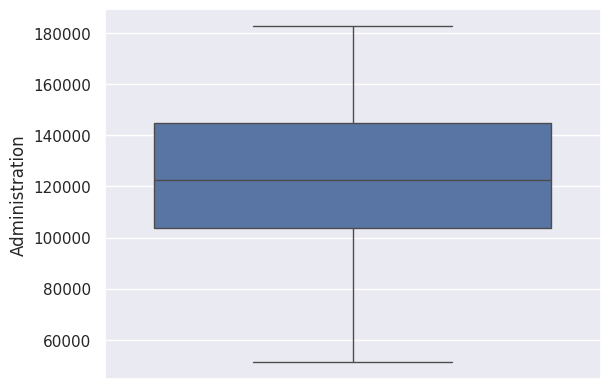

In [9]:
sns.boxplot(df['Administration'])

<Axes: ylabel='Marketing Spend'>

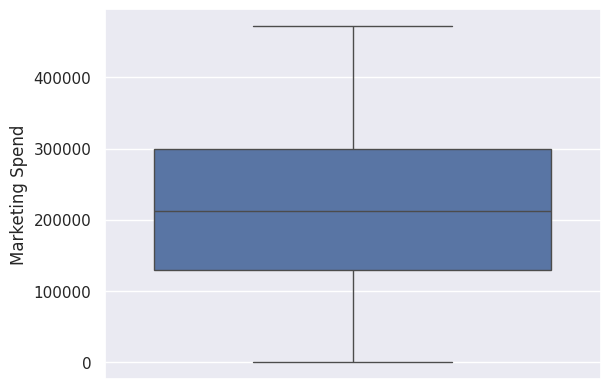

In [10]:
sns.boxplot(df['Marketing Spend'])

In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [13]:
#Encoding:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['State']=Le.fit_transform(df['State'])

In [14]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [15]:
#splitting the data into independent  and dependent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]



In [16]:
x.shape,y.shape

((50, 4), (50,))

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=131)

In [18]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((40, 4), (40,), (10, 4), (10,))

In [19]:
x_train

,R&D Spend,Administration,Marketing Spend,State
13,91992.39,135495.07,252664.93,0
10,101913.08,110594.11,229160.95,1
6,134615.46,147198.87,127716.82,0
14,119943.24,156547.42,256512.92,1
15,114523.61,122616.84,261776.23,2
23,67532.53,105751.03,304768.73,1
3,144372.41,118671.85,383199.62,2
11,100671.96,91790.61,249744.55,0
47,0.00,135426.92,0.00,0
22,73994.56,122782.75,303319.26,1


In [20]:
y_train

13    134307.35
10    146121.95
6     156122.51
14    132602.65
15    129917.04
23    108733.99
3     182901.99
11    144259.40
47     42559.73
22    110352.25
40     78239.91
5     156991.12
46     49490.75
8     152211.77
33     96778.92
7     155752.60
2     191050.39
17    125370.37
44     65200.33
48     35673.41
16    126992.93
34     96712.80
20    118474.03
21    111313.02
0     192261.83
27    105008.31
38     81229.06
1     191792.06
24    108552.04
18    124266.90
31     97483.56
32     97427.84
29    101004.64
37     89949.14
43     69758.98
42     71498.49
25    107404.34
41     77798.83
12    141585.52
30     99937.59
Name: Profit, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred_test=lr.predict(x_test)

In [23]:
y_pred_train=lr.predict(x_train)

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))
print("*********************"*5)
print(r2_score(y_test,y_pred_test))



0.9697857775284868
*********************************************************************************************************
0.8551433997491964


In [30]:
from sklearn import metrics
print('MSE',metrics.mean_squared_error(y_test,y_pred_test))
print('*******************'*5)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('***************************'*5)
print('MAPE',metrics.mean_absolute_percentage_error(y_test,y_pred_test))
print('***************************'*5)
print('MAE',metrics.mean_absolute_error(y_test,y_pred_test))

MSE 237366345.7001192
***********************************************************************************************
RMSE 15406.698079086225
***************************************************************************************************************************************
MAPE 0.3348060453160243
***************************************************************************************************************************************
MAE 12343.176547482517


In [31]:
print("coefficient:",lr.coef_)
print("intercept:",lr.intercept_)

coefficient: [ 8.15941715e-01 -5.90325619e-02  3.00182133e-02 -2.78884514e+03]
intercept: 55522.269546728574
